In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack


# Abrimos los datos.
medicion = np.loadtxt('data/v2/ej11_medicion.txt', delimiter=' ', skiprows=3)
print("Los datos an sido cargados")

Los datos an sido cargados


## Ejercico 1.1
### Función de referencia
Primero armamos una función de referencia con la que comparar nuestros datos. La info de la función con la que se realizaron los datos esta en el mismo archivo txt que contiene los datos.

In [2]:
### Defino variables temporales de la medición.
Fs = 100000               #[Hz] Frecuencia de muestreo                    
FRef = 200           #[Hz] Frecuencia de la referencia
L = len(medicion)         #[muestras] Longitud de la señal

# Calculamos variables asociadas 
T = 1/Fs                  #[s] Periodo de muestreo
MaxT = L/Fs               #[s] Tiempo maximo
t = np.linspace(0,L-1,L)*T         #[s] Time vector
OmegaRef = FRef*2*np.pi     #[rad/s] frecuencia angular de referencia

# Elección de tiempo caracteríscito y orden del filtro
fc= 15            #[Hz] Frecuencia de corte
orden = 3           # Orden del filtro.

#Genero las señales de referencia del lock-in.
Referencia_x=np.array(np.sin(OmegaRef*t))
Referencia_y=np.array(np.cos(OmegaRef*t))     #referencia desfasada en 90º

### Demodulación de la señal

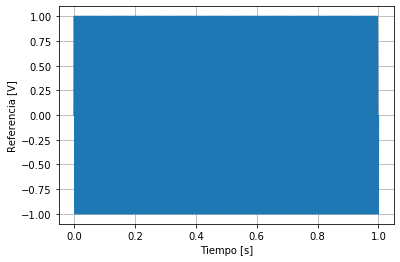

In [3]:
%matplotlib inline
# 1 Muestro la referencia.

plt.plot(t, Referencia_x, label='Referencia')
#plt.plot(t, Referencia_y, label='Referencia')

plt.ylabel('Referencia [V]')
plt.xlabel('Tiempo [s]')
plt.grid(True)
plt.show()

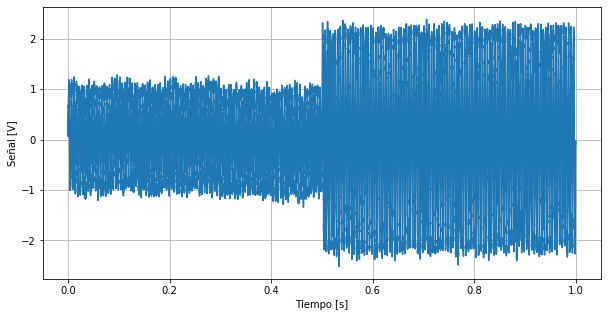

In [5]:
# 2 Muestro la señal
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(t, medicion, label='Señal')
plt.ylabel('Señal [V]')
plt.xlabel('Tiempo [s]')
plt.grid(True)
plt.show()

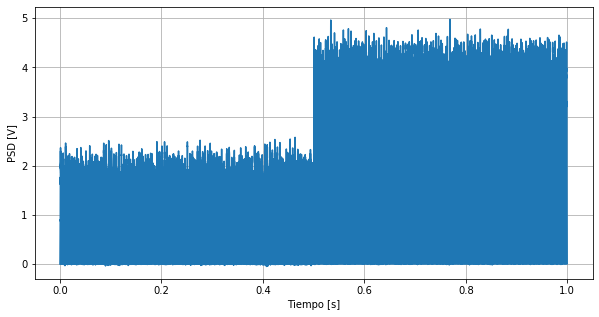

In [6]:
# 3 Detección de fase. Multiplicación por referencia
%matplotlib inline
plt.figure(figsize=(10,5))
#PSDx = np.sqrt((2 * medicion * Referencia_x)**2)
PSDx = 2 * medicion * Referencia_x
PSDy = 2 * medicion * Referencia_y #PSD del segundo canal
# Graficamos señal multiplicada
plt.plot(t, PSDx, label='Señal')
# ax[2].plot(t, PSDy, label='Señal')
plt.ylabel('PSD [V]')
plt.xlabel('Tiempo [s]')
plt.grid(True)
plt.show()

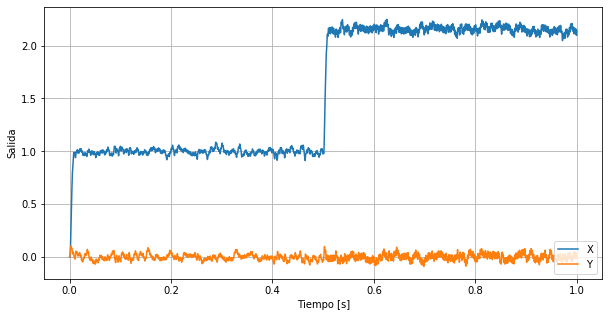

In [7]:
# Filtrado de señal 
sos = signal.bessel(orden, 2*np.pi*fc, 'low', fs=Fs,output='sos') # Generación de parametros del filrado
PSDxFiltrada= signal.sosfilt(sos,PSDx) # Filtrado
PSDyFiltrada= signal.sosfilt(sos,PSDy) # Filtrado

%matplotlib inline
plt.figure(figsize=(10,5))

## Para graficar R y theta
#plt.plot(t,np.arctan2(PSDyFiltrada,PSDxFiltrada,), label=r'$\theta$')
#plt.plot(t,PSDxFiltrada**2+PSDyFiltrada**2,label='R')

## Para graficar X e Y
plt.plot(t,PSDxFiltrada,label='X')
plt.plot(t,PSDyFiltrada,label='Y')
plt.legend(loc='lower right')
plt.ylabel('Salida')
plt.xlabel('Tiempo [s]')
plt.grid(True)
plt.show()

### Análisis de fourier de la señal

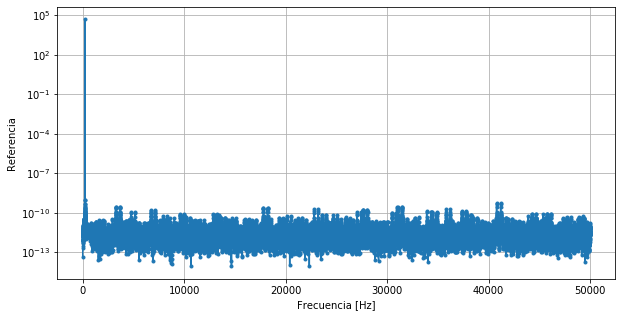

In [8]:
# Armamos el vector de frecuencias.
freqs=np.fft.fftfreq(L,1/Fs)

%matplotlib inline
plt.figure(figsize=(10,5))

# 1 Grafica la FFT de la referencia
fftReferencia= np.abs(np.fft.fft(Referencia_x));
plt.semilogy(freqs[0:L//2],fftReferencia[0:L//2],'.-') 
plt.ylabel('Referencia')
plt.xlabel('Frecuencia [Hz]')
#plt.xlim([1,2.5*FRef])
plt.xscale('linear')
plt.grid(True)
plt.show()


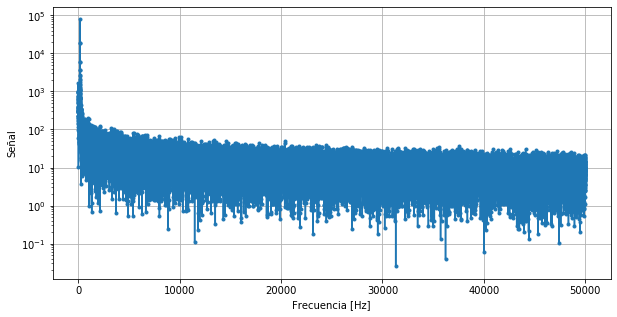

In [9]:
%matplotlib inline
plt.figure(figsize=(10,5))
# 2 Grafica la FFT de la señal
fftSenial= np.abs(np.fft.fft(np.array(medicion)))
plt.semilogy(freqs[0:L//2],fftSenial[0:L//2],'.-') 
plt.ylabel('Señal')
plt.xlabel('Frecuencia [Hz]')
#plt.xlim([1,2.5*FRef])
plt.xscale('linear')
plt.grid(True)
plt.show()


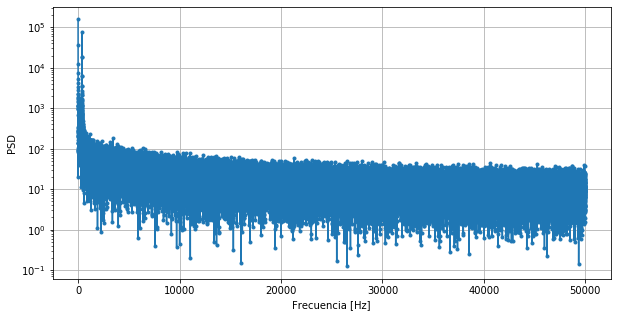

In [10]:
%matplotlib inline
plt.figure(figsize=(10,5))
# 3 Grafica la FFT de la señal multiplicada
fftPSDx= np.abs(np.fft.fft(PSDx));
fftPSDy= np.abs(np.fft.fft(PSDy));
plt.semilogy(freqs[0:L//2],fftPSDx[0:L//2],'.-') 
plt.ylabel('PSD')
plt.xlabel('Frecuencia [Hz]')
#plt.xlim([1,2.5*FRef])
plt.xscale('linear')
plt.grid(True)
plt.show()

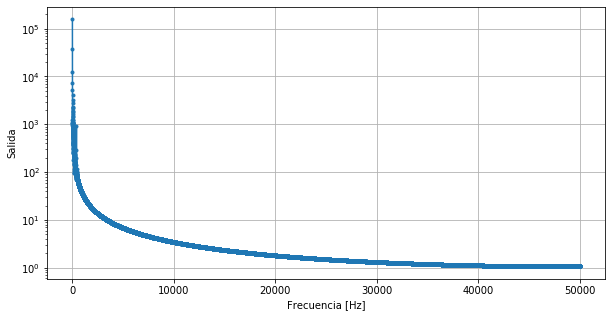

In [11]:
%matplotlib inline
plt.figure(figsize=(10,5))
# 4 Grafica la FFT de la señal demodulada
fftPSDxFiltrada= np.abs(np.fft.fft(PSDxFiltrada));
fftPSDyFiltrada= np.abs(np.fft.fft(PSDyFiltrada));
plt.semilogy(freqs[0:L//2],fftPSDxFiltrada[0:L//2],'.-') 
plt.ylabel('Salida')
plt.xlabel('Frecuencia [Hz]')
#plt.xlim([1,2.5*FRef])
plt.xscale('linear')
plt.grid(True)
plt.show()

## Ejercicio 1.2


In [78]:
medicion2 = np.loadtxt('data/v2/ej12_medicion.txt', delimiter=' ', skiprows=3)

In [15]:
# Frecuencia de sampleo=100000 Hz 
# Frecuencia de modulación = 200 Hz

In [79]:
### Defino variables temporales de la medición.
Fs = 100000          #[Hz] Frecuencia de muestreo                    
FRef =200;          #[Hz] Frecuencia de la referencia
L = len(medicion);     #[muestras] Longitud de la señal
# Calculamos variables asociadas 
T = 1/Fs;              #[s] Periodo de muestreo
MaxT = L/Fs;           #[s] Tiempo maximo
t = np.linspace(0,L-1,L)*T;         #[s] Time vector
OmegaRef = FRef*2*np.pi;     #[rad/s] frecuencia angular de referencia

# Elección de tiempo caracteríscito y orden del filtro
fc=1        #[Hz] Frecuencia de corte
orden = 1; # Orden del filtro.


#Genero las señales de referencia del lock-in.
Referencia_x=np.array(np.sin(OmegaRef*t));
Referencia_y=np.array(np.cos(OmegaRef*t)); #referencia desfasada en 90º


Primero miramos bien las frecuencias para ver la frecuencia de corte y que orden de filtro usamos.

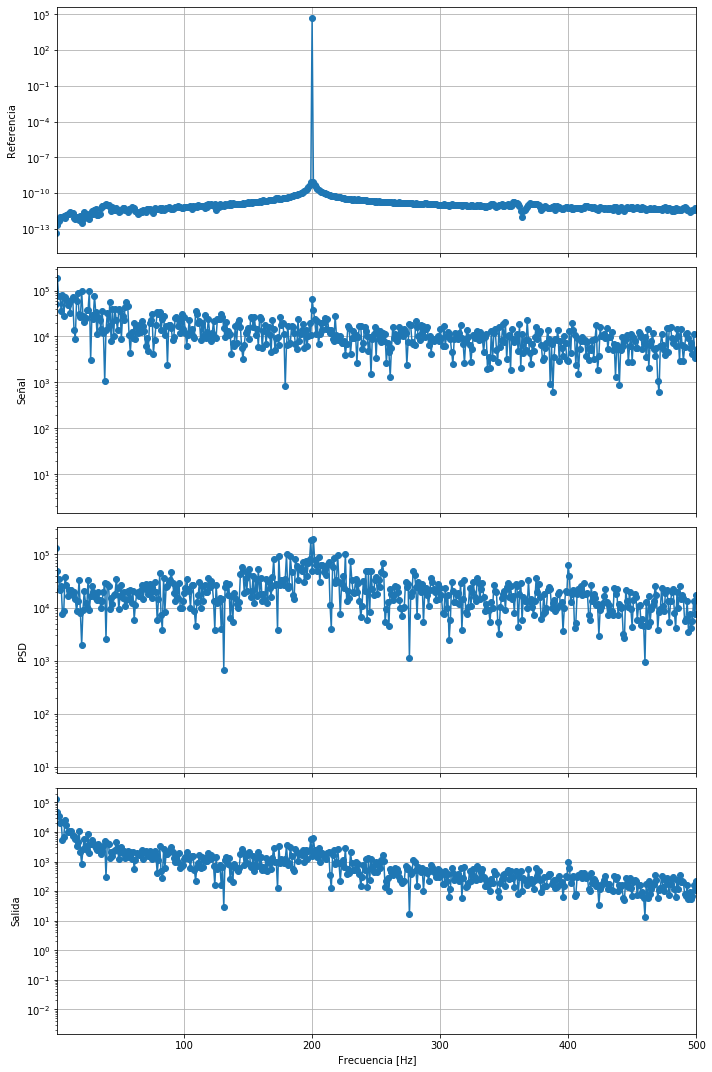

In [80]:
# Armamos una figura conjunta

plt.figure(figsize=(10,15))
plt.clf()
fig, ax = plt.subplots(4,1,num=1, sharex=True)
# Determinamos los ejes para todos lo gráficos.
ax[3].set_xlabel('Frecuencia [Hz]')
ax[3].set_xlim([1,2.5*FRef])
ax[3].set_xscale('linear')


# Armamos el vector de frecuencias.
freqs=np.fft.fftfreq(L,1/Fs)

# 1 Grafica la FFT de la referencia
fftReferencia= np.abs(np.fft.fft(Referencia_x));
ax[0].semilogy(freqs[0:L//2],fftReferencia[0:L//2],'o-') 
ax[0].set_ylabel('Referencia'),ax[0].grid(True)


# 2 Grafica la FFT de la señal
fftSenial= np.abs(np.fft.fft(medicion2));
ax[1].semilogy(freqs[0:L//2],fftSenial[0:L//2],'o-') 
ax[1].set_ylabel('Señal'),ax[1].grid(True)

# 3 Grafica la FFT de la señal multiplicada
fftPSDx= np.abs(np.fft.fft(PSDx));
fftPSDy= np.abs(np.fft.fft(PSDy));
ax[2].semilogy(freqs[0:L//2],fftPSDx[0:L//2],'o-') 
ax[2].set_ylabel('PSD'),ax[2].grid(True)


# 4 Grafica la FFT de la señal demodulada
fftPSDxFiltrada= np.abs(np.fft.fft(PSDxFiltrada));
fftPSDyFiltrada= np.abs(np.fft.fft(PSDyFiltrada));
ax[3].semilogy(freqs[0:L//2],fftPSDxFiltrada[0:L//2],'o-') 
ax[3].set_ylabel('Salida'),ax[3].grid(True)


plt.tight_layout()  

Cuando multiplicamos las señales s y r, con una señal ruidosa, nos queda de la forma:

$r \times s = \frac{A(t)}{2} + ruido(t) sen(\omega t) + \frac{A(t)}{2} cos(\omega t)$

Al tener una frecuencia de modulación baja, las amplitudes del ruido en PSD quedan del orden de la amplitud orifinal/2

(Text(0, 0.5, 'Salida'), None)

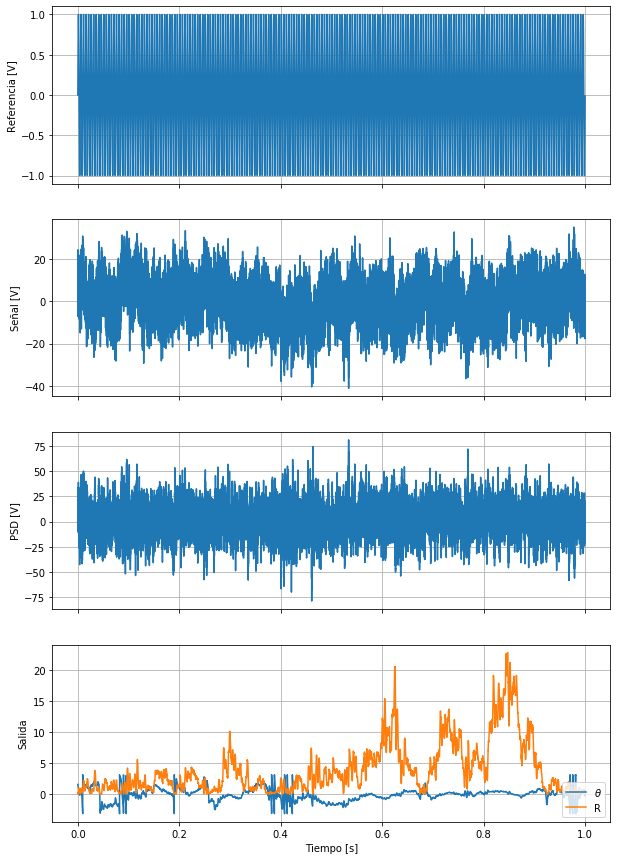

In [81]:
#%% Demodulación lock-in.

# Generamos una figura
plt.figure(figsize=(10,15))
plt.clf()
fig, ax = plt.subplots(4,1,num=1, sharex=True)
ax[3].set_xlabel('Tiempo [s]')


# 1 Muestro la referencia.
ax[0].plot(t, Referencia_x, label='Referencia')
#ax[0].plot(t, Referencia_y, label='Referencia')
ax[0].set_ylabel('Referencia [V]')
ax[0].grid(True)

# 2 Muestro la señal
ax[1].plot(t, medicion2, label='Señal')
ax[1].set_ylabel('Señal [V]'), ax[1].grid(True)

# 3 Detección de fase. Multiplicación por referencia
PSDx = 2 * medicion2 * Referencia_x;
PSDy = 2 * medicion2 * Referencia_y; #PSD del segundo canal
# Graficamos señal multiplicada
ax[2].plot(t, PSDx, label='Señal')
# ax[2].plot(t, PSDy, label='Señal')
ax[2].set_ylabel('PSD [V]'), ax[2].grid(True)


# Filtrado de señal 
sos = signal.bessel(orden, 2*np.pi*fc, 'low', fs=Fs,output='sos') # Generación de parametros del filrado
PSDxFiltrada= signal.sosfilt(sos,PSDx) # Filtrado
PSDyFiltrada= signal.sosfilt(sos,PSDy) # Filtrado


## Para graficar R y theta
ax[3].plot(t,np.arctan2(PSDyFiltrada,PSDxFiltrada,), label=r'$\theta$')
ax[3].plot(t,PSDxFiltrada**2+PSDyFiltrada**2,label='R')
## Para graficar X e Y
#ax[3].plot(t,PSDxFiltrada,label='X')
#ax[3].plot(t,PSDyFiltrada,label='Y')
plt.legend(loc='lower right')
ax[3].set_ylabel('Salida'), ax[3].grid(True)

## Ejercicio 1.4

In [85]:
medicion3 = np.loadtxt('data/v2/ej14_medicion.txt', delimiter=' ', skiprows=3)
# Frecuencia de sampleo=100000 Hz 
# Frecuencia de modulación = 20000 Hz

In [86]:
### Defino variables temporales de la medición.
Fs = 100000          #[Hz] Frecuencia de muestreo                    
FRef =20000;          #[Hz] Frecuencia de la referencia
L = len(medicion3);     #[muestras] Longitud de la señal
# Calculamos variables asociadas 
T = 1/Fs;              #[s] Periodo de muestreo
MaxT = L/Fs;           #[s] Tiempo maximo
t = np.linspace(0,L-1,L)*T;         #[s] Time vector
OmegaRef = FRef*2*np.pi;     #[rad/s] frecuencia angular de referencia

# Elección de tiempo caracteríscito y orden del filtro
fc=1        #[Hz] Frecuencia de corte
orden = 1; # Orden del filtro.


#Genero las señales de referencia del lock-in.
Referencia_x=np.array(np.sin(OmegaRef*t));
Referencia_y=np.array(np.cos(OmegaRef*t)); #referencia desfasada en 90º


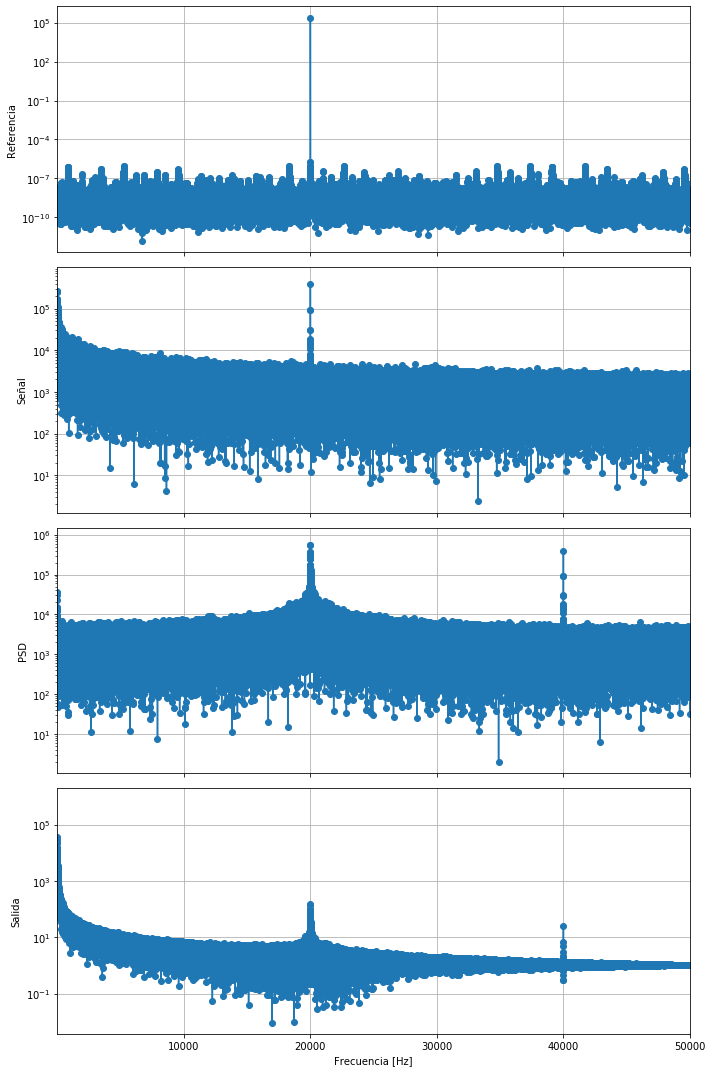

In [90]:
# Armamos una figura conjunta

plt.figure(figsize=(10,15))
plt.clf()
fig, ax = plt.subplots(4,1,num=1, sharex=True)
# Determinamos los ejes para todos lo gráficos.
ax[3].set_xlabel('Frecuencia [Hz]')
ax[3].set_xlim([1,2.5*FRef])
ax[3].set_xscale('linear')


# Armamos el vector de frecuencias.
freqs=np.fft.fftfreq(L,1/Fs)

# 1 Grafica la FFT de la referencia
fftReferencia= np.abs(np.fft.fft(Referencia_x));
ax[0].semilogy(freqs[0:L//2],fftReferencia[0:L//2],'o-') 
ax[0].set_ylabel('Referencia'),ax[0].grid(True)


# 2 Grafica la FFT de la señal
fftSenial= np.abs(np.fft.fft(medicion3));
ax[1].semilogy(freqs[0:L//2],fftSenial[0:L//2],'o-') 
ax[1].set_ylabel('Señal'),ax[1].grid(True)

# 3 Grafica la FFT de la señal multiplicada
fftPSDx= np.abs(np.fft.fft(PSDx));
fftPSDy= np.abs(np.fft.fft(PSDy));
ax[2].semilogy(freqs[0:L//2],fftPSDx[0:L//2],'o-') 
ax[2].set_ylabel('PSD'),ax[2].grid(True)


# 4 Grafica la FFT de la señal demodulada
fftPSDxFiltrada= np.abs(np.fft.fft(PSDxFiltrada));
fftPSDyFiltrada= np.abs(np.fft.fft(PSDyFiltrada));
ax[3].semilogy(freqs[0:L//2],fftPSDxFiltrada[0:L//2],'o-') 
ax[3].set_ylabel('Salida'),ax[3].grid(True)


plt.tight_layout()  

(Text(0, 0.5, 'Salida'), None)

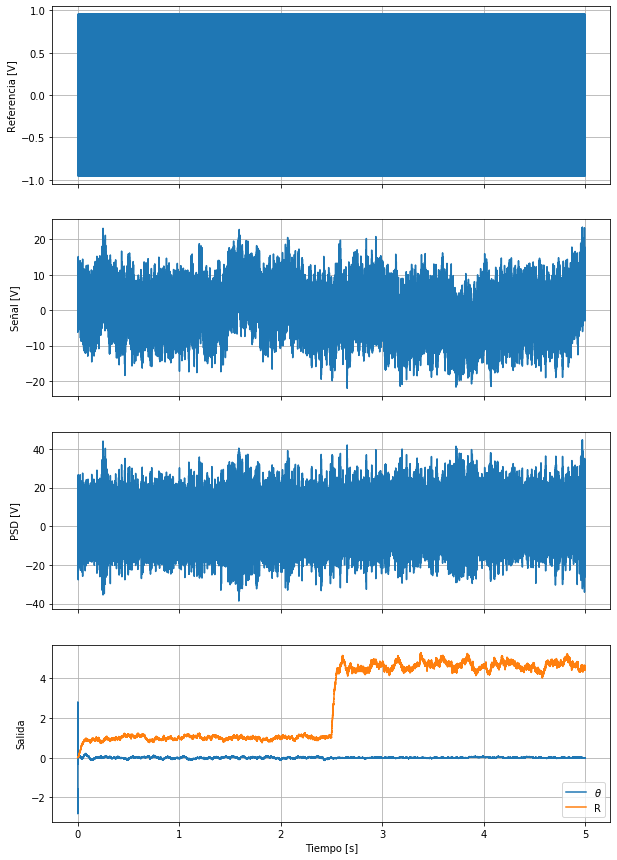

In [89]:
#%% Demodulación lock-in.

# Generamos una figura
plt.figure(figsize=(10,15))
plt.clf()
fig, ax = plt.subplots(4,1,num=1, sharex=True)
ax[3].set_xlabel('Tiempo [s]')


# 1 Muestro la referencia.
ax[0].plot(t, Referencia_x, label='Referencia')
#ax[0].plot(t, Referencia_y, label='Referencia')
ax[0].set_ylabel('Referencia [V]')
ax[0].grid(True)

# 2 Muestro la señal
ax[1].plot(t, medicion3, label='Señal')
ax[1].set_ylabel('Señal [V]'), ax[1].grid(True)

# 3 Detección de fase. Multiplicación por referencia
PSDx = 2 * medicion3 * Referencia_x;
PSDy = 2 * medicion3 * Referencia_y; #PSD del segundo canal
# Graficamos señal multiplicada
ax[2].plot(t, PSDx, label='Señal')
# ax[2].plot(t, PSDy, label='Señal')
ax[2].set_ylabel('PSD [V]'), ax[2].grid(True)


# Filtrado de señal 
sos = signal.bessel(orden, 2*np.pi*fc, 'low', fs=Fs,output='sos') # Generación de parametros del filrado
PSDxFiltrada= signal.sosfilt(sos,PSDx) # Filtrado
PSDyFiltrada= signal.sosfilt(sos,PSDy) # Filtrado


## Para graficar R y theta
ax[3].plot(t,np.arctan2(PSDyFiltrada,PSDxFiltrada,), label=r'$\theta$')
ax[3].plot(t,PSDxFiltrada**2+PSDyFiltrada**2,label='R')
## Para graficar X e Y
#ax[3].plot(t,PSDxFiltrada,label='X')
#ax[3].plot(t,PSDyFiltrada,label='Y')
plt.legend(loc='lower right')
ax[3].set_ylabel('Salida'), ax[3].grid(True)

In [ ]:
#%matplotlib qt
#def MakeSpectral(y, Fs, fignum=1):
#    
#    yfft = fftpack.fft(y)
#    N = len(y)
#    xf = np.linspace(0, Fs/2, int(N/2))
#    yf = 2.0/N * np.abs(yfft[:N//2])
#    #print(PosicionPicos)
#    #print(IntensidadPicos)
##    VectorFrecuenciaPicos = [xf[i] for i in PosicionPicos]
#    return xf, yf
#
#fsamp = Fs
#vv=np.array_split(medicion*Referencia_x,100)
#L=[]
#Lx=[]
#s=MakeSpectral(vv,fsamp)
#s0=s[0]
#for i in range(100):
#    l=MakeSpectral(vv[i], fsamp)
#    L.append(l[1])
#
#plt.style.use("classic")
#
#from matplotlib.colors import LogNorm
#plt.figure(figsize = (10, 7))
#nparr=np.linspace(0,150,len(s0))
#lis=[]
#liss0=[]#
#for i in range(len(s0)):
#    lis.append(nparr[i])
#    liss0.append(s0[i])
#
#plt.imshow(L,norm=LogNorm())
#esa=210.5*3/10
#esa2=33.5*3/10
##plt.axvline(esa,color='k')
##plt.axvline(esa2,color='k')
#
##plt.xticks([0,33.5*3/10,50*3/10,100*3/10,210.5*3/10,300*3/10,400*3/10,500*3/10],[0,33.5,50,100,211.4,300,400,500])
#plt.xlabel(r'$\omega$ (Hz)',fontsize=16)
#plt.ylabel(r'$\tau$ (0.03 s)',fontsize=16)
#plt.tight_layout()
#plt.show()